# _Classification - Sınıflandırma_

_Classification = Cevabı evet hayır veya positive, negative, nötr gibi olan modellerde kullanılır._ <br>
_Bu projede binlerce çalışanı olan bir şirket çalışanlarının işten ayrılıp ayrılmayacağını tahmin eden bir model geliştireceğiz_ <br>

### _İmport_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

# pandas kütüphanesi veri analizi ve tablo (DataFrame) işlemleri için kullanılır.
# Bu ayar, çıktıdaki maksimum sütun sayısını 100 olarak belirler, böylece veriler tam görünür.

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

### _Data Okuma_

In [2]:
df = pd.read_csv('hr_data.csv')

# 'hr_data.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

### _Eda_

In [3]:
df.head()

# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [4]:
df.head(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes


In [5]:
df.sample()

# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
277,38,Travel_Rarely,322,Sales,7,2,Medical,1,382,1,Female,44,4,2,Sales Executive,1,3,5605.0,19191,1,Y,Yes,24,4,3,80,1,8,3,3,8,0,7,7,No


In [6]:
df.isnull().sum()

# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

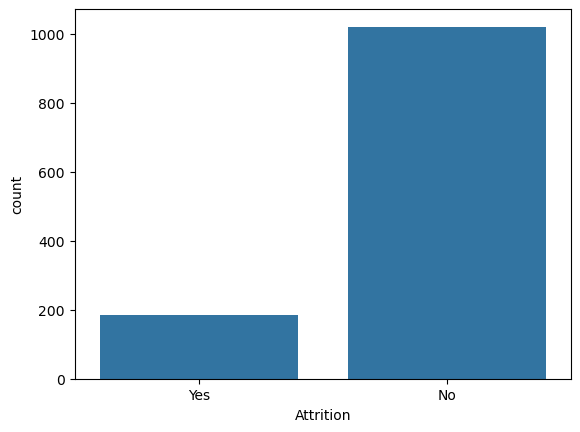

In [7]:
sns.countplot(x=df['Attrition']);

In [8]:
df['Attrition'].unique()

# 'Attrition' sütunundaki benzersiz (unique) değerleri listeler.
# Bu, sütunda hangi kategorilerin bulunduğunu görmeyi sağlar.
# (Not: Senin kodunda 'uniqe' yazılmış, doğrusu 'unique' olmalı.)

array(['Yes', 'No', nan], dtype=object)

In [9]:
df.shape

# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir

(1470, 35)

In [10]:
d={'No':0,'Yes':1}

# 'Attrition' sütunundaki kategorik değerleri sayısal değerlere çevirmek için bir sözlük oluşturur.

In [11]:
df['Attrition']=df['Attrition'].map(d) 

# 'Attrition' sütunundaki 'Yes' ve 'No' değerlerini sırasıyla 1 ve 0 olarak dönüştürür.
# map() fonksiyonu, for döngüsüne gerek kalmadan sütun bazında dönüşüm yapar.

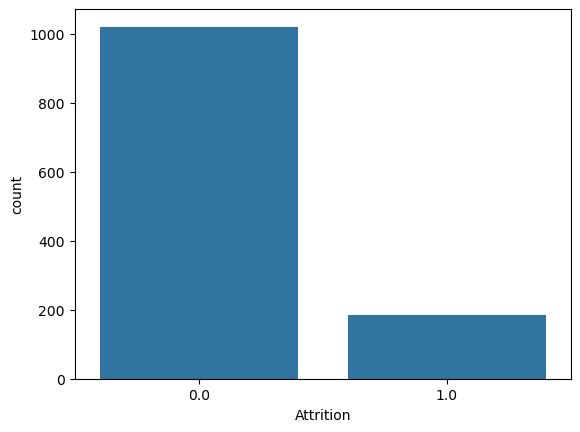

In [12]:
sns.countplot(x=df['Attrition']);

# 'Attrition' sütunundaki 0 ve 1 değerlerinin sayısını çubuk grafik (countplot) olarak görselleştirir.
# Bu, çalışanların şirkette kalma/ayrılma durumlarını görsel olarak analiz etmeyi sağlar.

In [13]:
bos=df[df['Attrition'].isnull()]

# 'Attrition' sütununda eksik (NaN) değere sahip olan satırları seçer.
# Bu satırlar 'bos' adlı DataFrame'e kaydedilir.

dolu=df[df['Attrition'].notnull()]

# 'Attrition' sütununda değeri bulunan (yani eksik olmayan) satırları seçer.
# Bu satırlar 'dolu' adlı DataFrame'e kaydedilir.

In [14]:
dolu.head()

# Eksik olmayan verilerin (dolu DataFrame'inin) ilk 5 satırını görüntüler.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0


In [15]:
bos.head()

# Eksik olan verilerin (bos DataFrame'inin) ilk 5 satırını görüntüler.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,NaN


In [16]:
x=dolu.drop('Attrition', axis=1)

# Bağımsız değişkenleri (özellikleri) içeren veri setini oluşturur.
# 'Attrition' sütunu çıkarılarak modelde kullanılacak girdiler (features) elde edilir.

y=dolu[['Attrition']]

# Bağımlı değişkeni (tahmin edilmek istenen hedef değişkeni) içeren veri setini oluşturur.
# Burada hedef değişken 'Attrition' sütunudur.

In [17]:
x=pd.get_dummies(x, drop_first=True)

# Kategorik değişkenleri (metin ifadeleri) sayısal değerlere dönüştürür.
# Her kategorik sütun için dummy (0-1) sütunlar oluşturur.
# drop_first=True parametresi, her kategoriden bir sütunu düşürerek "dummy trap" (çoklu doğrusal bağlantı) riskini azaltır.

In [18]:
x.shape

# Dönüştürülmüş 'x' veri setinin boyutlarını (satır, sütun) döndürür.
# Böylece dönüşüm sonrası sütun sayısındaki artış görülebilir.

(1205, 46)

In [19]:
x.head()

# Dönüştürülmüş 'x' veri setinin ilk 5 satırını görüntüler.
# Bu sayede kategorik değişkenlerin nasıl 0-1 formatına çevrildiği incelenebilir.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False


### _Modelling_

#### _Datayı İkiye Bölelim;_

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)  

# Veriyi eğitim ve test olarak ayırıyoruz
# x -> özellikler (features), y -> hedef değişken (target)
# test_size=0.15 -> verinin %15'i test için ayrılır, %85'i eğitim için
# random_state=42 -> veriyi her çalıştırmada aynı şekilde bölmek için sabit sayı

#### _Classification Yapalım;_

##### _GaussianNB - BernoulliNB_

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [23]:
g = GaussianNB()  
# Gaussian Naive Bayes modelini oluşturuyoruz (sürekli sayısal veriler için)

b = BernoulliNB()  
# Bernoulli Naive Bayes modelini oluşturuyoruz (binary / 0-1 veriler için)

In [24]:
g.fit(x_train, y_train)  

# Modeli eğitim verisi ile eğitiyoruz

GaussianNB()

In [25]:
b.fit(x_train, y_train)  

# Modeli eğitim verisi ile eğitiyoruz

BernoulliNB()

In [26]:
gtahmin = g.predict(x_test)  

# Test verisi üzerinde tahmin yapıyoruz

In [27]:
btahmin = b.predict(x_test)  

# Test verisi üzerinde BernoulliNB modeli ile tahmin yapıyoruz

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
accuracy_score(y_test, gtahmin)  

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.7955801104972375

In [30]:
confusion_matrix(y_test, gtahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[132,  30],
       [  7,  12]])

In [31]:
print(classification_report(y_test, gtahmin))  

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88       162
         1.0       0.29      0.63      0.39        19

    accuracy                           0.80       181
   macro avg       0.62      0.72      0.64       181
weighted avg       0.88      0.80      0.83       181



<Axes: >

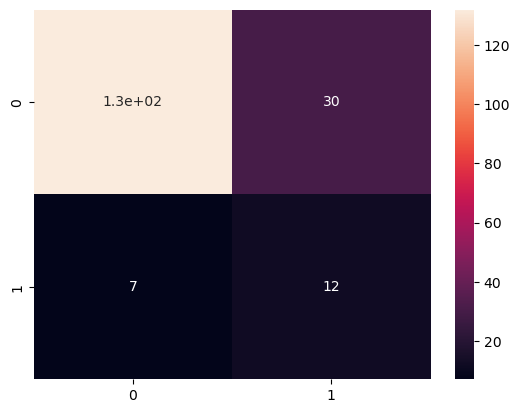

In [32]:
sns.heatmap(confusion_matrix(y_test, gtahmin), annot=True)  

# Karışıklık matrisini görselleştiriyoruz, hücrelerde değerleri gösteriyoruz

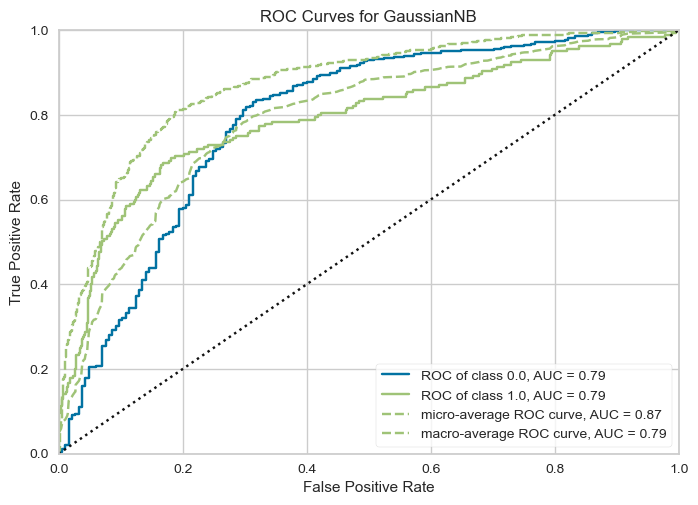

In [33]:
from yellowbrick.classifier import roc_auc
from yellowbrick.datasets import load_spam

visualizer = roc_auc(GaussianNB(), x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

In [34]:
accuracy_score(y_test, btahmin)  

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.850828729281768

In [35]:
confusion_matrix(y_test, btahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[149,  13],
       [ 14,   5]])

In [36]:
print(classification_report(y_test, btahmin))  

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       162
         1.0       0.28      0.26      0.27        19

    accuracy                           0.85       181
   macro avg       0.60      0.59      0.59       181
weighted avg       0.85      0.85      0.85       181



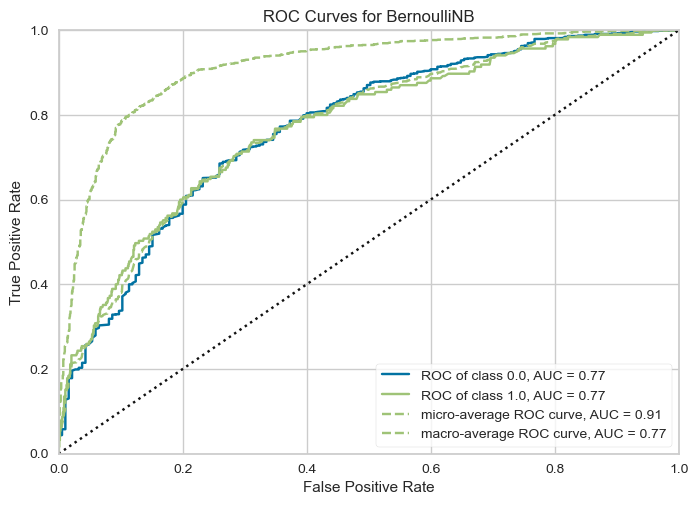

In [37]:
from yellowbrick.classifier import roc_auc
from yellowbrick.datasets import load_spam

visualizer = roc_auc(BernoulliNB(), x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

##### _LogisticRegression_

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
L = LogisticRegression()  

# Lojistik Regresyon modelini oluşturuyoruz (sınıflandırma için, 0/1 tahmini)

In [40]:
L.fit(x_train, y_train)  

# Modeli eğitim verisi ile eğitiyoruz

LogisticRegression()

In [41]:
Ltahmin = L.predict(x_test)  

# Test verisi üzerinde tahmin yapıyoruz

In [42]:
accuracy_score(y_test, Ltahmin)  

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.9005524861878453

In [43]:
confusion_matrix(y_test, Ltahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[162,   0],
       [ 18,   1]])

In [44]:
print(classification_report(y_test, Ltahmin))

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       162
         1.0       1.00      0.05      0.10        19

    accuracy                           0.90       181
   macro avg       0.95      0.53      0.52       181
weighted avg       0.91      0.90      0.86       181



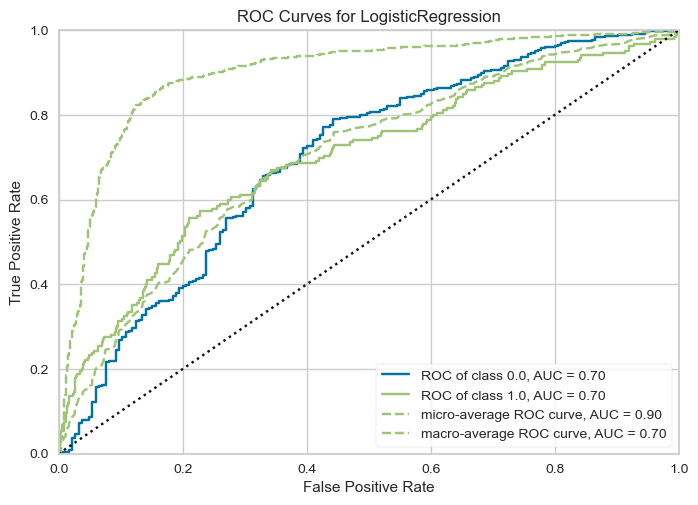

In [45]:
visualizer = roc_auc(LogisticRegression(), x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz4- DecisionTreeClassifier

##### _DecisionTreeClassifier_

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
d = DecisionTreeClassifier()  

# Karar Ağacı sınıflandırıcısını oluşturuyoruz

In [48]:
d.fit(x_train, y_train)  

# Modeli eğitim verisi ile eğitiyoruz

DecisionTreeClassifier()

In [49]:
dtahmin = d.predict(x_test)  

# Test verisi üzerinde tahmin yapıyoruz

In [50]:
accuracy_score(y_test, dtahmin) 

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.8176795580110497

In [51]:
confusion_matrix(y_test, dtahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[142,  20],
       [ 13,   6]])

In [52]:
print(classification_report(y_test, dtahmin))  

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       162
         1.0       0.23      0.32      0.27        19

    accuracy                           0.82       181
   macro avg       0.57      0.60      0.58       181
weighted avg       0.84      0.82      0.83       181



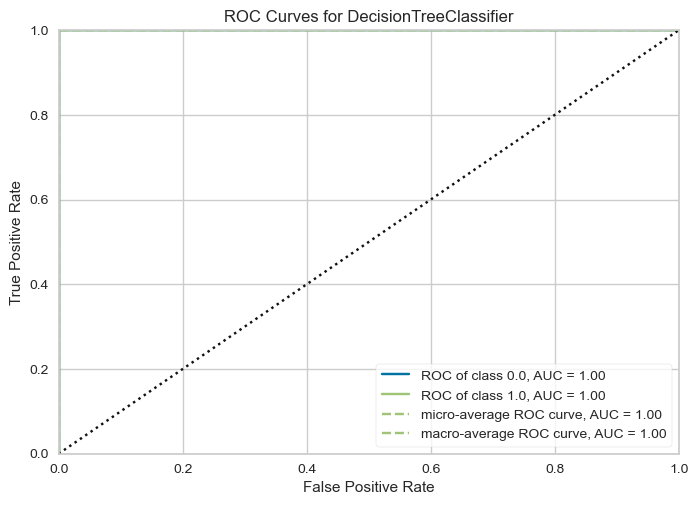

In [53]:
visualizer = roc_auc(DecisionTreeClassifier(), x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

##### _RandomForestClassifier_

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
r = RandomForestClassifier()  

# Random Forest sınıflandırıcısını oluşturuyoruz (birden fazla karar ağacının birleşimi)

In [56]:
rtahmin = r.fit(x_train, y_train).predict(x_test) 

# Modeli eğitim verisi ile eğitiyoruz ve test verisi üzerinde tahmin yapıyoruz
# fit ve predict tek satırda kullanılmış

In [57]:
accuracy_score(y_test, rtahmin)  

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.9005524861878453

In [58]:
confusion_matrix(y_test, rtahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[161,   1],
       [ 17,   2]])

In [59]:
print(classification_report(y_test, rtahmin))  

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       162
         1.0       0.67      0.11      0.18        19

    accuracy                           0.90       181
   macro avg       0.79      0.55      0.56       181
weighted avg       0.88      0.90      0.87       181



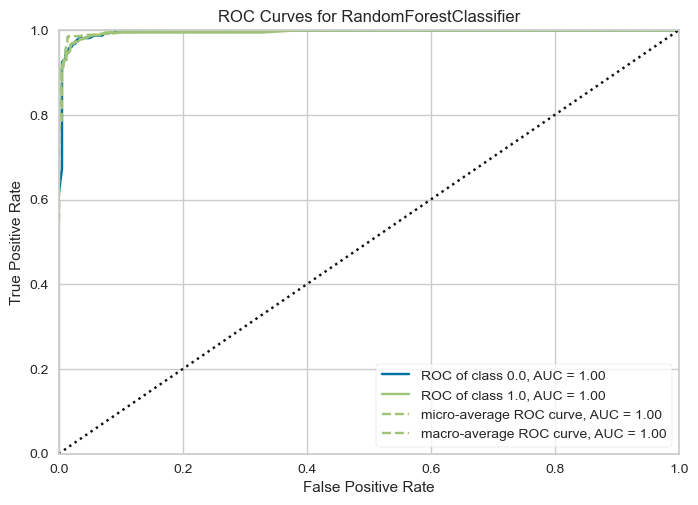

In [60]:
visualizer = roc_auc(r, x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

##### _KNeighborsClassifier_

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
k = KNeighborsClassifier()  

# K-En Yakın Komşu (KNN) sınıflandırıcısını oluşturuyoruz

In [63]:
ktahmin = k.fit(x_train, y_train).predict(x_test)  

# Modeli eğitim verisi ile eğitiyoruz ve test verisi üzerinde tahmin yapıyoruz
# fit ve predict tek satırda kullanılmış

In [64]:
accuracy_score(y_test, ktahmin)  

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.856353591160221

In [65]:
confusion_matrix(y_test, ktahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[154,   8],
       [ 18,   1]])

In [66]:
print(classification_report(y_test, ktahmin))  

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       162
         1.0       0.11      0.05      0.07        19

    accuracy                           0.86       181
   macro avg       0.50      0.50      0.50       181
weighted avg       0.81      0.86      0.83       181



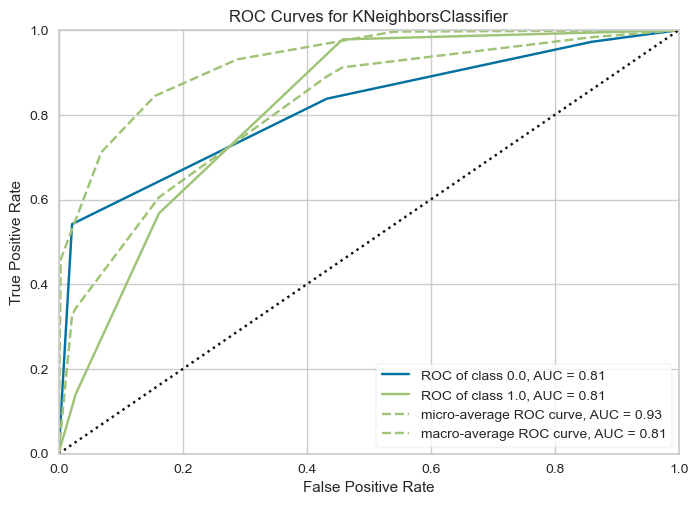

In [67]:
visualizer = roc_auc(k, x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

##### _GradientBoostingClassifier_

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
h = GradientBoostingClassifier()  

# Gradyan Artırımlı Karar Ağacı sınıflandırıcısını oluşturuyoruz (Boosting yöntemi ile model performansını artırır)

In [70]:
htahmin = h.fit(x_train, y_train).predict(x_test)  

# Modeli eğitim verisi ile eğitiyoruz ve test verisi üzerinde tahmin yapıyoruz
# fit ve predict tek satırda kullanılmış

In [71]:
accuracy_score(y_test, htahmin) 

# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.9060773480662984

In [72]:
confusion_matrix(y_test, htahmin)  

# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[159,   3],
       [ 14,   5]])

In [73]:
print(classification_report(y_test, htahmin))  

# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       162
         1.0       0.62      0.26      0.37        19

    accuracy                           0.91       181
   macro avg       0.77      0.62      0.66       181
weighted avg       0.89      0.91      0.89       181



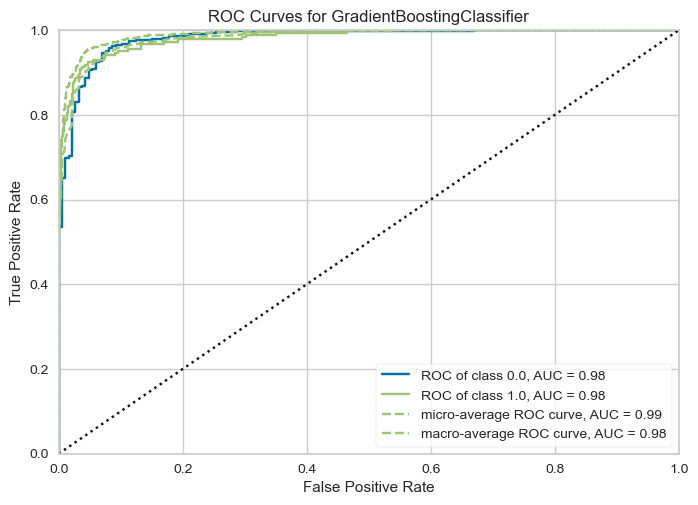

In [74]:
visualizer = roc_auc(h, x, y)  

# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

##### _Tek Kod İle Tüm Modellere Bakalım;_

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [76]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[192  19]
 [ 23   7]]
LogisticRegression()  modeli eğitiliyor!..
[[209   2]
 [ 30   0]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[178  33]
 [ 23   7]]
RandomForestClassifier()  modeli eğitiliyor!..
[[210   1]
 [ 28   2]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[208   3]
 [ 24   6]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[205   6]
 [ 29   1]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[204   7]
 [ 21   9]]
MultinomialNB()  modeli eğitiliyor!..
[[115  96]
 [  9  21]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[208   3]
 [ 24   6]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       211
         1.0       0.67      0.20      0.31        30

    accuracy                           0.89       241
   macro avg       0.78      0.59      0.62       241
weighted avg       0.87      0.

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.887967,0.887967,0.887967,0.887967
AdaBoostClassifier,0.883817,0.883817,0.883817,0.883817
RandomForestClassifier,0.879668,0.879668,0.879668,0.879668
LogisticRegression,0.867220,0.867220,0.867220,0.867220
KNeighborsClassifier,0.854772,0.854772,0.854772,0.854772
BernoulliNB,0.825726,0.825726,0.825726,0.825726
DecisionTreeClassifier,0.767635,0.767635,0.767635,0.767635
MultinomialNB,0.564315,0.564315,0.564315,0.564315


_Bu projede binlerce çalışanı olan bir şirket çalışanlarının işten ayrılıp ayrılmayacağını tahmin eden bir model geliştirdik._

_En iyi sonucu GradientBoostingClassifier modeli ile aldık. Accuracy Score; 88.79_